### Data Mining Principles - Winter 2023
### Loan Approval Prediction

#### Minh Vo

In this project, I will build and train machine learning models for predicting the interest rate on the loan using given features. One of the project's goals is to minimize the measure of root mean square error (RMSE) when testing and comparing the models.

### Setting up the environment and importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Preprocessing the data

Import train & validation test datasets.
<br> There are several entries where values have been deleted to simulate dirty data.

In [2]:
train = pd.read_csv("Data for Cleaning & Modeling.csv")
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [3]:
test = pd.read_csv("Holdout for Testing.csv")
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


Interest Rate on the loan (*X1*) will be the target variable for prediction, which is a continuous variable.

#### Data Cleaning

Understanding the meaning of variables in the train dataset: <br>
* X1:	Interest Rate on the loan
* X2:	A unique id for the loan.
* X3:	A unique id assigned for the borrower.
* X4:	Loan amount requested
* X5:	Loan amount funded
* X6:	Investor-funded portion of loan
* X7:	Number of payments (36 or 60)
* X8:	Loan grade
* X9:	Loan subgrade
* X10:	Employer or job title (self-filled)
* X11:	Number of years employed (0 to 10; 10 = 10 or more)
* X12:	Home ownership status: RENT, OWN, MORTGAGE, NONE, OTHER.
* X13:	Annual income of borrower
* X14:	Income verified, not verified, or income source was verified
* X15:	Date loan was issued
* X16:	Reason for loan provided by borrower
* X17:	Loan category, as provided by borrower
* X18:	Loan title, as provided by borrower
* X19:	First 3 numbers of zip code
* X20:	State of borrower
* X21:	A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrowers self-reported monthly income.
* X22:	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* X23:	Date the borrower's earliest reported credit line was opened
* X24:	Number of inquiries by creditors during the past 6 months.
* X25:	Number of months since the borrower's last delinquency.
* X26:	Number of months since the last public record.
* X27:	Number of open credit lines in the borrower's credit file.
* X28:	Number of derogatory public records
* X29:	Total credit revolving balance
* X30:	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* X31:	The total number of credit lines currently in the borrower's credit file
* X32:	The initial listing status of the loan. Possible values are W, F

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
X2,399999.0,9.984493e+06,7.928778e+06,54734.0,3151742.50,8234778.0,15329598.50,28753146.00
X3,399999.0,1.133899e+07,8.663918e+06,70699.0,3727711.50,9667699.0,17312191.50,31278050.00
X13,338972.0,7.316015e+04,5.586770e+04,3000.0,45000.00,63000.0,88200.00,7500000.00
X21,399999.0,1.700079e+01,7.704189e+00,0.0,11.25,16.7,22.52,39.99
X22,399999.0,2.745282e-01,7.782095e-01,0.0,0.00,0.0,0.00,29.00
X24,399999.0,8.171545e-01,1.058746e+00,0.0,0.00,0.0,1.00,8.00
X25,181198.0,3.431212e+01,2.178731e+01,0.0,16.00,31.0,50.00,188.00
X26,51155.0,7.632040e+01,2.980451e+01,0.0,54.00,80.0,103.00,129.00
X27,399999.0,1.111795e+01,4.898569e+00,0.0,8.00,10.0,14.00,76.00
X28,399999.0,1.522854e-01,4.973886e-01,0.0,0.00,0.0,0.00,63.00


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

Given the dataset, I will consider dropping some columns, especially categorical and text columns, which have nothing to do with the prediction of loan approvals, as well as columns with a huge number of missing values which can hardly be filled with statistical values (mean, median, etc.) <br>
* X2:	A unique id for the loan. 
* X3:	A unique id assigned for the borrower
* X9:	Loan subgrade
<br> *X9 is a subgrade of X8 (Loan Grade) column so it may not be really necessary. X9 also contain a large number of missing values (61270).* 
* X10:	Employer or job title (self-filled). 
<br> *This column also contains a number of missing values*
* X11:	Number of years employed (0 to 10; 10 = 10 or more). 
<br> *This column also contains a number of missing values*
* X15:	Date loan was issued
* X16:	Reason for loan provided by borrower
* X17:	Loan category, as provided by borrower
* X18:	Loan title, as provided by borrower
* X19:	First 3 numbers of zip code
* X20:	State of borrower
* X23:	Date the borrower's earliest reported credit line was opened
* X25:	Number of months since the borrower's last delinquency.
* X26:	Number of months since the last public record.
<br> *Columns X25 and X26 contain a large number of missing values. Since they are 'Month', they cannot be filled by 0 or any of the statistical alternatives*

In [6]:
train = train.drop(["X2", "X3", "X9", "X10", "X11", "X15", "X16", "X17", "X18", "X19", "X20", "X23", "X25", "X26"],axis=1)

Some columns (X1, X4, X5, X6, X7, X30) contain characters and symbols like *$, %*, so they need to be removed so these columns can be converted into numeric values.

In [7]:
train['X1'] = pd.to_numeric(train['X1'].str.replace('%',''))/100

train['X4'] = train['X4'].str.replace('$', '')
train['X4'] = pd.to_numeric(train['X4'].str.replace(',', ''))

train['X5'] = train['X5'].str.replace('$', '')
train['X5'] = pd.to_numeric(train['X5'].str.replace(',', ''))

train['X6'] = train['X6'].str.replace('$', '')
train['X6'] = pd.to_numeric(train['X6'].str.replace(',', ''))

train['X7'] = pd.to_numeric((train['X7'].str.replace('months','')))

train['X30'] = pd.to_numeric(train['X30'].str.replace('%',''))/100

train.head()

,X1,X4,X5,X6,X7,X8,X12,X13,X14,X21,X22,X24,X27,X28,X29,X30,X31,X32
0,0.1189,25000.0,25000.0,19080.0,36.0,B,RENT,85000.0,VERIFIED - income,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,0.1071,7000.0,7000.0,673.0,36.0,B,RENT,65000.0,not verified,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,0.1699,25000.0,25000.0,24725.0,36.0,D,RENT,70000.0,VERIFIED - income,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,0.1311,1200.0,1200.0,1200.0,36.0,C,OWN,54000.0,not verified,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,0.1357,10800.0,10800.0,10692.0,36.0,C,RENT,32000.0,not verified,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,40.0,f


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X4      399999 non-null  float64
 2   X5      399999 non-null  float64
 3   X6      399999 non-null  float64
 4   X7      399999 non-null  float64
 5   X8      338730 non-null  object 
 6   X12     338639 non-null  object 
 7   X13     338972 non-null  float64
 8   X14     399999 non-null  object 
 9   X21     399999 non-null  float64
 10  X22     399999 non-null  float64
 11  X24     399999 non-null  float64
 12  X27     399999 non-null  float64
 13  X28     399999 non-null  float64
 14  X29     399999 non-null  float64
 15  X30     399733 non-null  float64
 16  X31     399999 non-null  float64
 17  X32     399999 non-null  object 
dtypes: float64(14), object(4)
memory usage: 54.9+ MB


<AxesSubplot:xlabel='X1'>

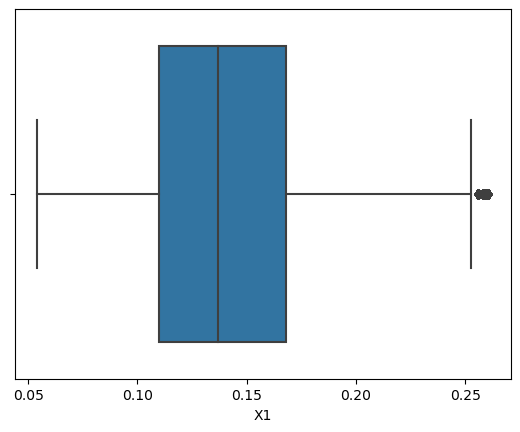

In [9]:
# Plot the histogram distribution of X1. It can be seen that there are a number of outliers.
sns.boxplot(train['X1'])

In [10]:
train["X1"].describe()

count    338990.000000
mean          0.139463
std           0.043780
min           0.054200
25%           0.109900
50%           0.136800
75%           0.167800
max           0.260600
Name: X1, dtype: float64

**Dealing with missing values given current features:** <br>

Since the target variable *X1* (interest Rate on the loan) contains a large number of null values (61010 values, accounting for over 10% of the data), I will drop all these missing values. 
*X8* has more than 60000 missing categorical values which can be dropped. Besides, there are 8 classes under this feature, so I will perform one-hot encode to this feature later.
Similar to *X8*, *X12* also has over 60K missing categorical values which cannot be filled by numeric ones, so I will drop all these null value in this column.

Feature *X13* (annual income of borrowers) and *X30* (amount of credit the borrower is using) are also important features, so I will fill its missing values with their average values.<br>

Finally, I will drop missing values in remaining columns because they only have one missing value.

In [11]:
#Drop missing values in X1, X8, and X12, X25
train = train.dropna(subset = ["X1","X8","X12"])

#Fill missing values in X13 and X30 with their mean
train["X13"] = train["X13"].fillna(train.X13.mean())
train["X30"] = train["X30"].fillna(train.X30.mean())

#Drop missing value of remaining columns (1 missing value each)
train.dropna(subset = ["X4","X5","X6","X7","X14","X21","X22","X24","X27","X28","X29","X31","X32"])

train.isna().sum()

X1     0
X4     0
X5     0
X6     0
X7     0
X8     0
X12    0
X13    0
X14    0
X21    0
X22    0
X24    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
dtype: int64

#### EDA and Feature Engineering

<AxesSubplot:xlabel='X1'>

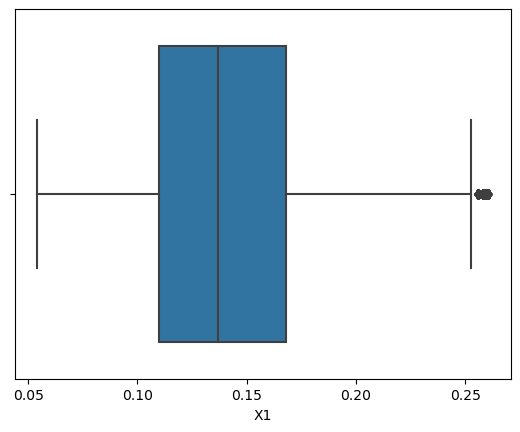

In [12]:
# Plot the histogram distribution of X1 after dropping null values. There seems to be no difference.
sns.boxplot(train['X1'])

In [13]:
train["X1"].describe()

count    242995.000000
mean          0.139373
std           0.043745
min           0.054200
25%           0.109900
50%           0.136800
75%           0.167800
max           0.260600
Name: X1, dtype: float64

In [14]:
train.dtypes

X1     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8      object
X12     object
X13    float64
X14     object
X21    float64
X22    float64
X24    float64
X27    float64
X28    float64
X29    float64
X30    float64
X31    float64
X32     object
dtype: object

There are still some categorical variables in the data set, so I need to encode them before training the model

##### Interest Rate vs Loan Grade (X8)

<AxesSubplot:xlabel='X8', ylabel='X1'>

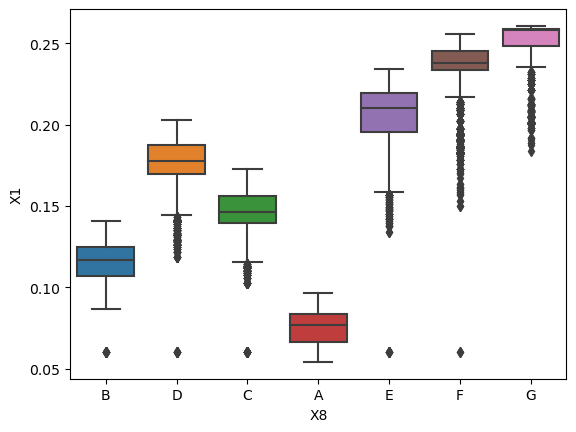

In [15]:
sns.boxplot(x="X8",y="X1",data=train)

Loan grade G has the highest interest rate while grade A has the lowest interest rate. <br>
Yet, this feature also contains a number of outliers

In [16]:
# Encode each category of loan grade: A-G --> 1-->7
train["X8"].replace({"A":1, "B":2, "C":3, "D":4, "E":5, "F": 6, "G":7},inplace=True)
train["X8"]

0         2
1         2
2         4
3         3
4         3
         ..
399993    4
399995    3
399996    4
399997    2
399998    4
Name: X8, Length: 242995, dtype: int64

##### Interest Rate vs Home Ownership Status (X12)

<AxesSubplot:xlabel='X12', ylabel='X1'>

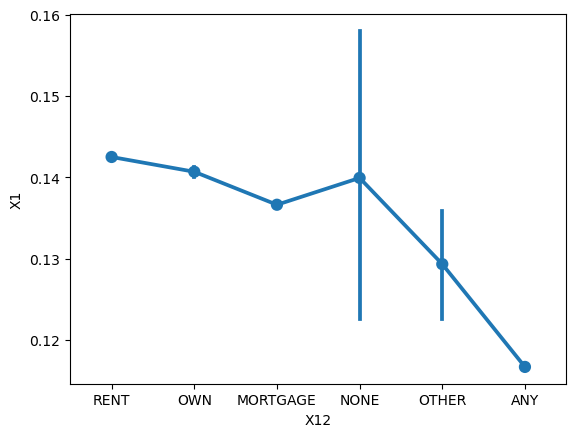

In [17]:
sns.pointplot(x="X12",y="X1",data=train)

<AxesSubplot:xlabel='X12', ylabel='count'>

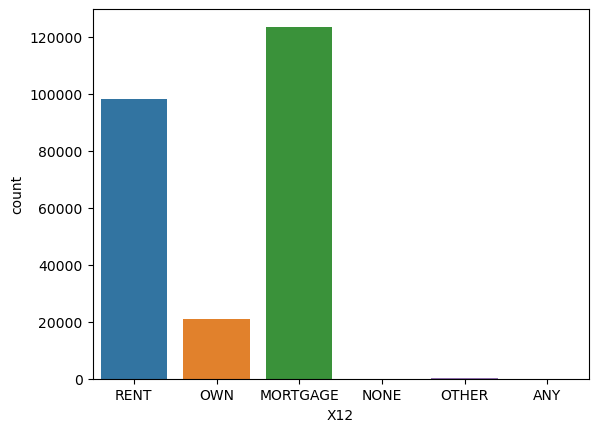

In [18]:
sns.countplot(x="X12",data=train)

Feature *X12* (Home ownership) includes 3 status: RENT, OWN, MORTGAGE, NONE, OTHER. The number of values with NONE, OTHER, and ANY are very small, compared to RENT, OWN, MORTGAGE status. They also seem to be ambiguous, so I will choose to drop NONE, OTHER, and ANY statusm, and keep the RENT, OWN, MORTGAGE since they can be important features that affect the loan's interest rates. <br>
Perform one-hot encoding for some RENT, OWN, MORTGAGE, OTHER in *X12*.


In [19]:
# Drop NONE & ANY STATUS
train = train.drop(train.index[train['X12'].isin(["NONE","OTHER","ANY"])])

# Perform one-hot encoding for RENT, OWN, MORTGAGE
train = pd.get_dummies(train, prefix = ["X12"], columns = ["X12"])

In [20]:
train.head()

,X1,X4,X5,X6,X7,X8,X13,X14,X21,X22,X24,X27,X28,X29,X30,X31,X32,X12_MORTGAGE,X12_OWN,X12_RENT
0,0.1189,25000.0,25000.0,19080.0,36.0,2,85000.0,VERIFIED - income,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,f,0,0,1
1,0.1071,7000.0,7000.0,673.0,36.0,2,65000.0,not verified,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,f,0,0,1
2,0.1699,25000.0,25000.0,24725.0,36.0,4,70000.0,VERIFIED - income,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,17.0,f,0,0,1
3,0.1311,1200.0,1200.0,1200.0,36.0,3,54000.0,not verified,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,31.0,f,0,1,0
4,0.1357,10800.0,10800.0,10692.0,36.0,3,32000.0,not verified,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,40.0,f,0,0,1


##### Interest Rates vs Income Status (X14)

<AxesSubplot:xlabel='X14', ylabel='X1'>

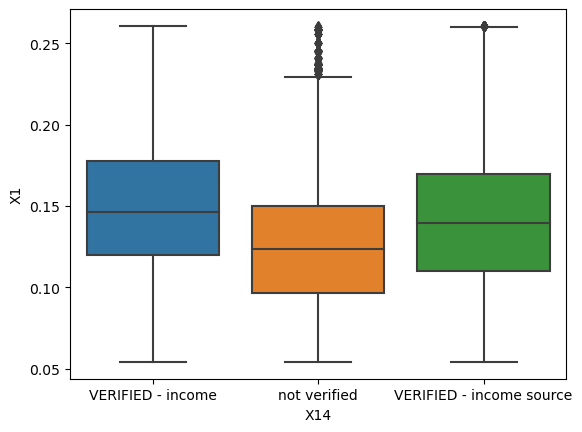

In [21]:
sns.boxplot(x="X14",y="X1",data=train)

There are only 3 types of income status, so I will just encode them by getting dummies.

In [22]:
train = pd.get_dummies(train, prefix = ["X14"], columns = ["X14"])

##### Interest Rates vs Loan's Initial Status (X32)

In [23]:
# Encode 2 types of initial listing status of loans: W, F
    ##W -> 1
    ##F -> 0
train["X32"].replace("w",1,inplace=True)
train["X32"].replace("f",0,inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242873 entries, 0 to 399998
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   X1                            242873 non-null  float64
 1   X4                            242873 non-null  float64
 2   X5                            242873 non-null  float64
 3   X6                            242873 non-null  float64
 4   X7                            242873 non-null  float64
 5   X8                            242873 non-null  int64  
 6   X13                           242873 non-null  float64
 7   X21                           242873 non-null  float64
 8   X22                           242873 non-null  float64
 9   X24                           242873 non-null  float64
 10  X27                           242873 non-null  float64
 11  X28                           242873 non-null  float64
 12  X29                           242873 non-nul

<AxesSubplot:>

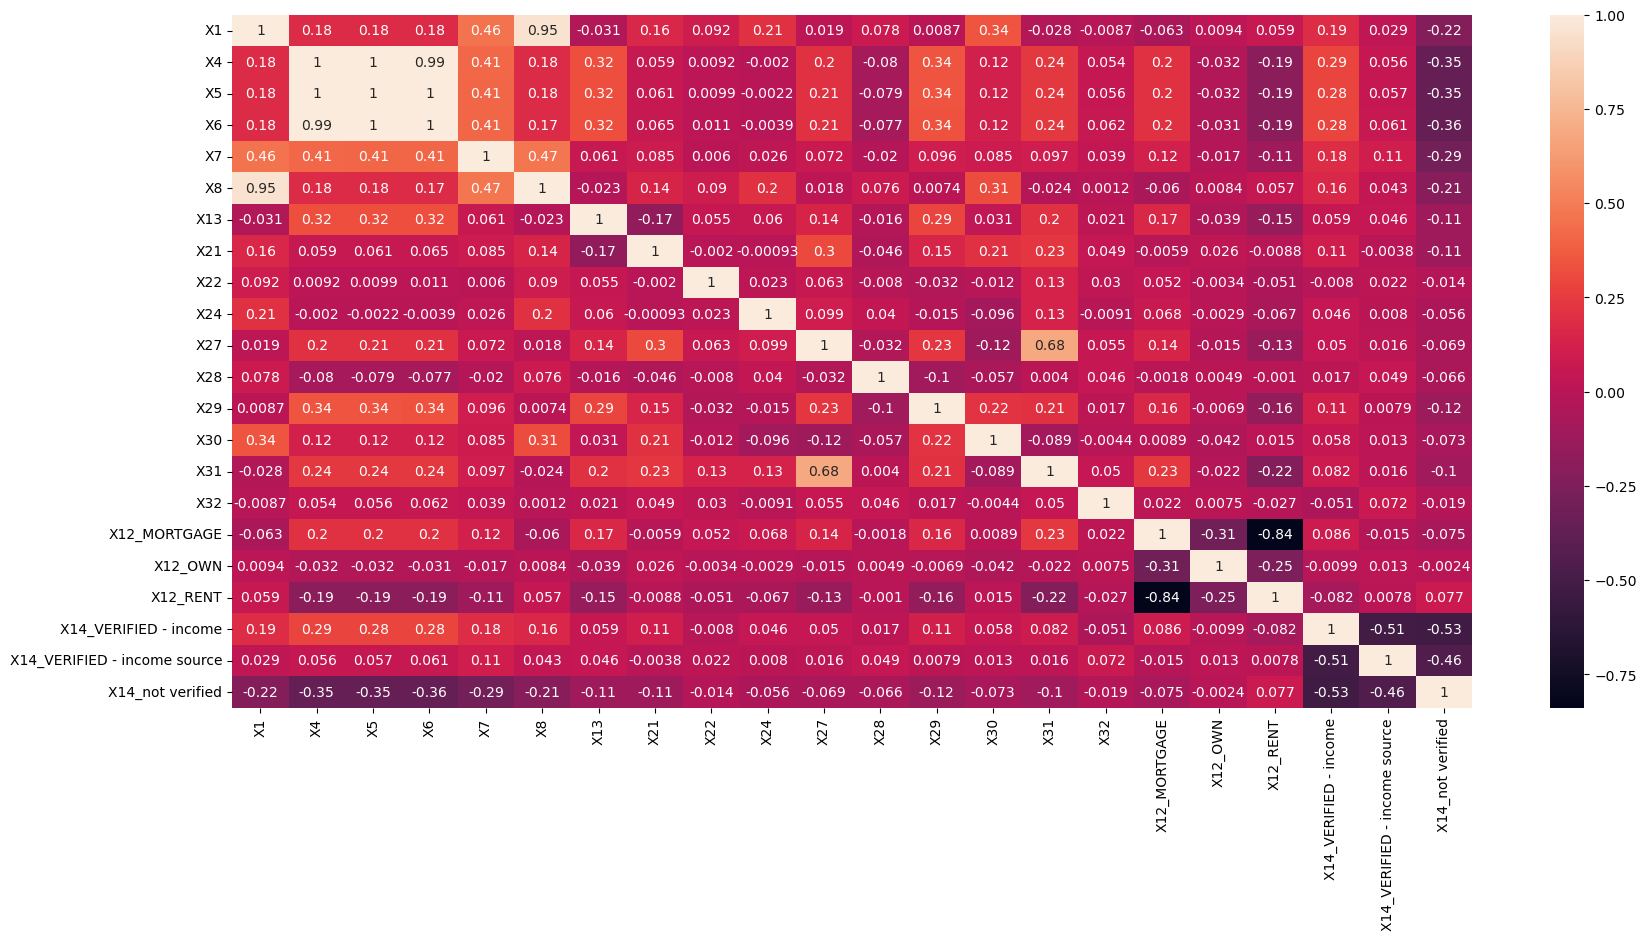

In [25]:
# Create a correlation matrix to understand the relationships between target variable 'X1' and other predictors.
corr = train.corr()
fig, ax = plt.subplots(figsize=(20,9))   
sns.heatmap(corr, annot=True)

From the correlation matrix, it can be seen that there is a strong positive relationship between the interest rate and the loan grade (X8) feature, which can be a strong predictor. The number of payment (X7) also seems to have a relatively strong relationship with the interest rate. Besides, relationships of the Loan Amount Requested, Loan Amount Funded, and Investor-funded portion of loan (X4, X5, X6) are very strong.

##### Interest Rate vs Number of Payment (X7)

<AxesSubplot:xlabel='X7', ylabel='X1'>

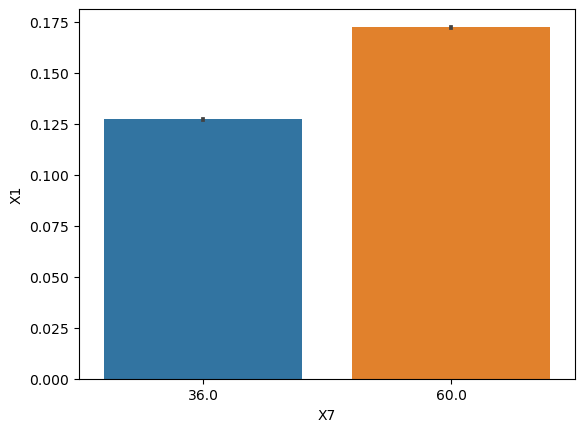

In [26]:
sns.barplot(x="X7",y="X1",data=train)

I created this chart since I want to take a look more at the relationship between the interest rate and the number of payments, including two primary types: 36 months and 60 months. It is clear that the higher the number of payments is (the longer the payment term is), the higher the interest rate is.

### Building Models

In order to predict the interest rate assigned to a loan, I will try and implement different statistical and machine learning models including Linear Regression, Decision Tree Regressor, and Random Forest Regressor to train the models. For each model, the RMSE will also be measured to compare the models.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Scale data before training the model
X = train.drop(['X1'],axis=1)
y = train['X1']
y.value_counts()

0.1099    8015
0.1561    7121
0.1299    7113
0.0890    6895
0.0790    6137
          ... 
0.1696       1
0.2459       1
0.1715       1
0.1872       1
0.1790       1
Name: X1, Length: 477, dtype: int64

In [29]:
# Split data into train and validation test size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

#### Linear Regression

In [30]:
lr = LinearRegression()
lr_pipe = make_pipeline(StandardScaler(), lr)
lr_pipe.fit(X_train, y_train) 
ypred_lr = lr_pipe.predict(X_test)

# Calculate RMSE
rmse_lr = mean_squared_error(y_test, ypred_lr, squared=False)
print("RMSE when implementing Linear Regression: ", rmse_lr)

RMSE when implementing Linear Regression:  0.012483758555436411


#### Decision Tree

Before implementing Decision Tree, I would like to identify the maximum depth, which implies the number of splits perfomed in the Decision Tree. 

In [31]:
# Identify best maximum depth and RMSE with respect to its max_depth
for d in range(1,15):
    dctree = DecisionTreeRegressor(max_depth = d, random_state = 42)
    dctree.fit(X_train, y_train)
    ypred_dt = dctree.predict(X_test)
    print("For max_depth = ",d,", RMSE =",mean_squared_error(y_test,ypred_dt,squared=False))

For max_depth =  1 , RMSE = 0.02729943996137987
For max_depth =  2 , RMSE = 0.01648553651201736
For max_depth =  3 , RMSE = 0.01245967100771622
For max_depth =  4 , RMSE = 0.012301285928313714
For max_depth =  5 , RMSE = 0.012195540217862648
For max_depth =  6 , RMSE = 0.012133820311241186
For max_depth =  7 , RMSE = 0.012061741502496035
For max_depth =  8 , RMSE = 0.012018164342819241
For max_depth =  9 , RMSE = 0.011987917120652478
For max_depth =  10 , RMSE = 0.011979506894318533
For max_depth =  11 , RMSE = 0.011999562267643954
For max_depth =  12 , RMSE = 0.012150574482757163
For max_depth =  13 , RMSE = 0.012288753890828438
For max_depth =  14 , RMSE = 0.012559889835298148


In [32]:
# Choose max_depth = 10 given the lowest RMSE
dtree = DecisionTreeRegressor(max_depth = 10,random_state = 42)
dtree_pipe = make_pipeline(StandardScaler(), dtree)
dtree_pipe.fit(X_train, y_train) 
ypred_dtree = dtree_pipe.predict(X_test)

# Calculate RMSE
rmse_dtree = mean_squared_error(y_test, ypred_dtree, squared=False)
print("RMSE when implementing Decision Tree: ", rmse_dtree)

RMSE when implementing Decision Tree:  0.011980188343327114


##### Random Forest

In [33]:
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(StandardScaler(), rf)
rf_pipe.fit(X_train, y_train) 
ypred_rf = rf_pipe.predict(X_test)

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, ypred_rf, squared=False)
print("RMSE when implementing Random Forest: ", rmse_rf)

RMSE when implementing Random Forest:  0.011708318214786132


In [34]:
# Create a Dataframe to compare RMSE of each model
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [rmse_lr, rmse_dtree, rmse_rf]
    })
rmse_df.sort_values(by='RMSE', ascending=True)

,Model,RMSE
2,Random Forest,0.011708
1,Decision Tree,0.011980
0,Linear Regression,0.012484


In [35]:
# Create a Dataframe to compare the Predicted the predicted results from each model with the Actual result
pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test
pred_df['Pred_RandomForest'] = ypred_rf
pred_df['Pred_DecisionTree'] = ypred_dtree
pred_df['Pred_LinearRegression'] = ypred_lr
pred_df

,Actual,Pred_RandomForest,Pred_DecisionTree,Pred_LinearRegression
8846,0.0714,0.070843,0.070721,0.074884
180445,0.0890,0.078363,0.081432,0.087358
38350,0.1942,0.206829,0.208261,0.206611
206860,0.1299,0.116266,0.112461,0.113251
117071,0.2100,0.203574,0.209428,0.205029
...,...,...,...,...
323595,0.0769,0.079071,0.078164,0.081397
11726,0.1186,0.112218,0.111139,0.108216
392039,0.1167,0.115736,0.115603,0.116300
352929,0.1449,0.147334,0.145429,0.143813


###### Feature Importance

Random forests also offers the feature importance indicator. It calculates the importance of each feature using the gini importance. Feature importance is an effective method to choose the best features for building the models.

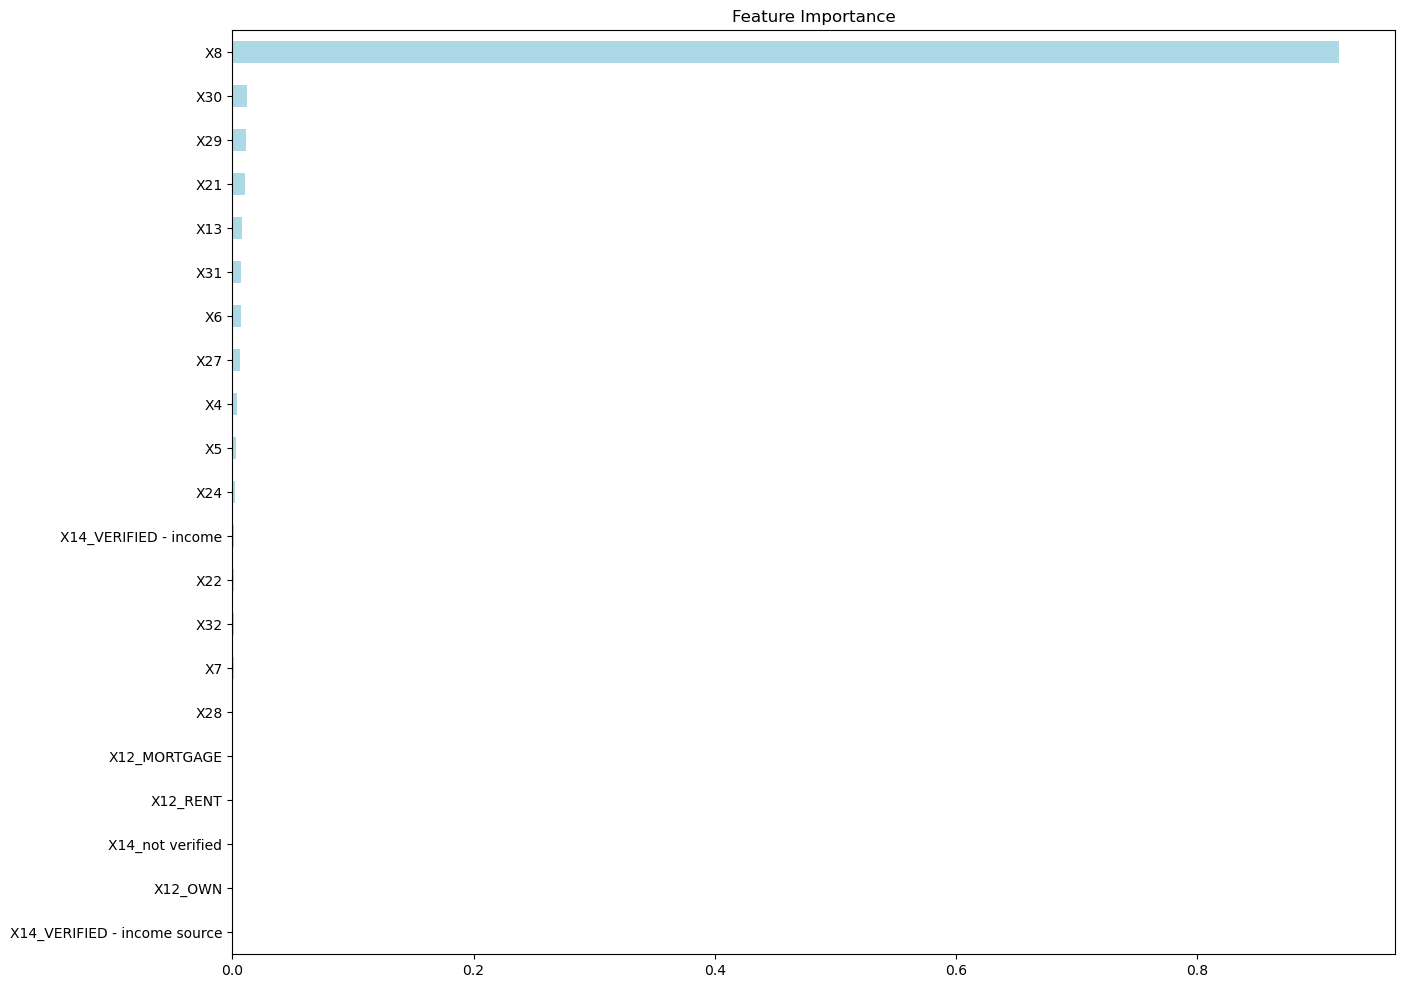

In [36]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

importance_rf = pd.Series(forest.feature_importances_, index = X.columns)
sorted_importance = importance_rf.sort_values(ascending = True)

sorted_importance.plot(kind = "barh",color = "lightblue", figsize=(15,12))
plt.title("Feature Importance")
plt.show()

As mentioned in the correlation matrix, the Loan Grade (X8) has a very strong relationship with the interest rate and it is likely to be a strong predictor. And we can see that Loan Grade is the most important feature based on the Feature Importance chart, followed by the Revolving Utilization Rate (X30), Total Credit Revolving Balance (X29), Monthly debt payment over Monthly Income (X21).

### Testing Models

Having compared and selected the model, I will apply the model to the test dataset. Before that, I have to import the test data and perform some data cleaning steps to make the test data similar to the cleaned train dataset. 

In [37]:
test = pd.read_csv("Holdout for Testing.csv")
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [38]:
# Drop the unnecessary variables, including the Target variable
test = test.drop(["X1", "X2", "X3", "X9", "X10", "X11", "X15", "X16", "X17", "X18", "X19", "X20", "X23", "X25", "X26"],axis=1)

#Remove symbols in string and convert values into numeric
test['X4'] = test['X4'].str.replace('$', '')
test['X4'] = pd.to_numeric(test['X4'].str.replace(',', ''))
test['X5'] = test['X5'].str.replace('$', '')
test['X5'] = pd.to_numeric(test['X5'].str.replace(',', ''))
test['X6'] = test['X6'].str.replace('$', '')
test['X6'] = pd.to_numeric(test['X6'].str.replace(',', ''))
test['X7'] = pd.to_numeric((test['X7'].str.replace('months','')))
test['X30'] = pd.to_numeric(test['X30'].str.replace('%',''))/100

#Fill missing values in X30 with its mean
test["X30"] = test["X30"].fillna(test.X30.mean())

#One-hot encoding
test["X8"].replace({"A":1, "B":2, "C":3, "D":4, "E":5, "F": 6, "G":7},inplace=True)
test = pd.get_dummies(test, prefix = ["X12"], columns = ["X12"])
test = pd.get_dummies(test, prefix = ["X14"], columns = ["X14"])
test["X32"].replace("w",1,inplace=True)
test["X32"].replace("f",0,inplace=True)

test.head()

,X4,X5,X6,X7,X8,X13,X21,X22,X24,X27,...,X29,X30,X31,X32,X12_MORTGAGE,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,6000,6000,6000,36,3,68000.0,28.31,0,1,18,...,19861,0.645,33,0,1,0,0,1,0,0
1,24000,24000,24000,36,1,110480.0,16.03,0,1,12,...,17001,0.262,36,1,0,0,1,1,0,0
2,35000,35000,35000,36,3,86000.0,32.49,0,0,16,...,25797,0.499,33,1,1,0,0,1,0,0
3,10000,10000,10000,60,4,30000.0,32.96,0,1,13,...,9586,0.438,21,1,0,0,1,0,1,0
4,24000,24000,24000,60,2,82500.0,31.03,0,0,27,...,31842,0.413,43,1,1,0,0,1,0,0


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X4                            80000 non-null  int64  
 1   X5                            80000 non-null  int64  
 2   X6                            80000 non-null  int64  
 3   X7                            80000 non-null  int64  
 4   X8                            80000 non-null  int64  
 5   X13                           80000 non-null  float64
 6   X21                           80000 non-null  float64
 7   X22                           80000 non-null  int64  
 8   X24                           80000 non-null  int64  
 9   X27                           80000 non-null  int64  
 10  X28                           80000 non-null  int64  
 11  X29                           80000 non-null  int64  
 12  X30                           80000 non-null  float64
 13  X

In [40]:
# Copy updated test dataset to a new df
X_testset = test

In [41]:
# Run best model on the test dataset
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(StandardScaler(), rf)
rf_pipe.fit(X_train, y_train) 
ypred_rf = rf_pipe.predict(X_testset)

#### Generating the Output File

In [42]:
test = pd.read_csv("Holdout for Testing.csv")
predictions = pd.DataFrame({
    "LoanID": test["X2"],
    "InterestRate": ypred_rf
})
predictions.to_csv("Loan Prediction Results from mdvo.csv",index = False)

### Discussion

**Linear Regression**: Using Linear Regression to predict the loan's interest rate with 18 features resulted in the RMSE of 0.0125. Linear Regression is traditional and the most common method to predict a continuous variable, so it is simple to implement without many required parameters and easy to interpret. However, I think given a target variable with many predictors, multicorlinearlity is likely to occur. Also, linear regression is sensitive to outliers, which may lead to overfitting.
<br> 
**Decision Tree**: Predicting the Loan's interest rate using Decision Tree Regressor, given the current cleaned training dataset with 18 features, gave the RMSE of 0.012, yet I think it can be improved by performing tunning with more parameters. Decision Tree is easy to interpret since it has a tree-like flowchart structure can be used in both classification and regression, and it does not require a lot of preprocessing process. Yet, it is easily affected by noise, which may lead to overfitting. 
<br>
**Random Forest**: With 18 features, implementing Random Forest model led to the RMSE of 0.017, which is the lowest RMSE among three models. Random Forest is likely to deliver the most accurate predictions compared to other models since it consists of multiple decision trees in the process and it takes the average of all predictions so the model hardly encounters overfitting.  Similar to Decision Tree, Random Forest can also be applied in classification and regression problems. The only thing is Random Forest may be hard to interpret when there are a number of trees within each decision tree. Random Forest model also takes more time to process.
<br>
<br>
After working on the project, here are some of the key lessons that I have learned: <br>
* It takes much more time to train and implement Random Forest compared to other machine learning models.
* Target variable (interest rate) as well as some other predictors still contain a number of outliers, which may affect the model's accuracy.
* More feature engineering steps should have been conducted, which will be helpful to minimize the RMSE and improve the model's prediction accuracy. For example, borrower's annual income (X13) could be a strong predictor so I would consider dividing this feature into groups based on the income levels.